In [1]:
from keras.datasets import mnist
from matplotlib import pyplot
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


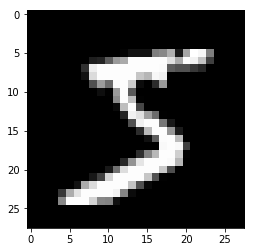

In [6]:
pyplot.imshow(x_train[0], cmap=pyplot.get_cmap('gray'))

In [7]:
noise_factor = 0.25
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0. , 1.)
x_test_noisy = np.clip(x_test_noisy, 0. , 1.)

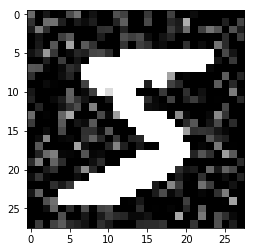

In [8]:
pyplot.imshow(x_train_noisy[0], cmap=pyplot.get_cmap('gray'))

In [9]:
x_train = x_train_noisy
x_test = x_test_noisy

In [10]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [11]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [12]:
x_train /= 255
x_test /= 255

In [13]:
x_train[0][0][0]

array([0.00163297], dtype=float32)

In [14]:
# Final Model
model = Sequential()
model.add(Conv2D(28, activation='relu', kernel_size=(3,3), input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(50,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.8737 - accuracy: 0.7397
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3634 - accuracy: 0.8903
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3174 - accuracy: 0.9037
Epoch 4/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2908 - accuracy: 0.9111
Epoch 5/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2704 - accuracy: 0.9172
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2550 - accuracy: 0.9217
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2407 - accuracy: 0.9270
Epoch 8/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2280 - accuracy: 0.9317
Epoch 9/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2184 - accuracy: 0.9340
Epoch 10/10
1875/1875 [==============================] - 12s 7ms/step - l

In [15]:

model.evaluate(x_test, y_test)


313/313 [==============================] - 1s 2ms/step - loss: 0.2011 - accuracy: 0.9397


[0.2010926753282547, 0.9397000074386597]